In [1]:
import random
import string
import time
import matplotlib.pyplot as plt

# **Infinite Monkey Theorem**

**The Infinite Monkey Theorem outlines a scenario where a monkey, given infinite time, will randomly type and reproduce any written text `almost surely`. For example a monkey will eventually randomly write the works of William Shakespeare given an infinite period of time.**

**The basis of the theorem lies in Probability Theory. An event labeled as `almost surely` to happen means it will happen with a probability of 1 given an infinite number of trials. If the number of trials is finite, then the outcome that a monkey will write a Shakespeare work is no longer guaranteed and the probability is less than or equal to 1.** 

<sup>Source: [Probability and the Infinite Monkey Theorem
](https://bpb-us-w2.wpmucdn.com/web.sas.upenn.edu/dist/e/952/files/2023/12/Marchlinski-Presentation-F23.pdf) by Dylan Marchlinski

## **Mathematical Proof**

**1. We assume that the keyboard has 26 keys represented by $\large{k}$. There is an equal probability that the monkey will type any of the characters on the keyboard $\large{\frac{1}{k}}$.**

**2. For a single trial the probability of typing the target text $\large{T}$ depends on the numbers of keys in the keyboard $\large{k}$ and the number of characters in the text $\large{n}$: $\large{P(T)=(\frac{1}{k})^n=\frac{1}{k^n}}$**

**3. A successful outcome where the monkey correctly writes the text starting at the $\large{i}$ th character is represented by $\large{A_i}$. The probability of a successful event is given by $\large{P(A_i)=\frac{1}{k^n}}$. Since the trials are independent the joint probability of typing the text correctly in multiple independent trials is the product of individual probabilities: $\large{P(A_1 \cap A_2 \cdots \cap A_n) = P(A_1)\cdot P(A_2) \cdot \ \cdots \ \cdot P(A_n)}$**

**4. Given an infinite series of keystrokes the probability that the text will be typed at least once is given by: $\large{P(\bigcup^{\infty}_{i=1}A_i)}$**

**5. Using the [Second Borel-Cantelli Lemma](https://proofwiki.org/wiki/Second_Borel-Cantelli_Lemma) we can show if the trials are infinite, $\large{\sum_{i=1}^{\infty}P(A_i)=\infty}$, and the events $\large{A_i}$ are independent, then the probability that the text is typed by the monkey is almost surely $\large{1}$: $\large{P\left( \limsup\limits_{i \to \infty} A_i \right) = 1}$**

**6. The probability of typing the text $\large{T}$ in any specific block of $\large{n}$ characters is given by: $\large{P(T) = \frac{1}{k^n}}$.**

**Since there are infinitely many independent trials, the sum of the probabilities of all such events is: $\large{\sum_{i=1}^{\infty} P(A_i) = \sum_{i=1}^{\infty} \frac{1}{k^n} = \infty}$**

**This means that with infinite trials, the probability that the text will be typed at least once is 1, which guarantees that the text will be typed `almost surely`.**

<sup>Source: [Monkeys and Walks](https://math.uchicago.edu/~may/VIGRE/VIGRE2006/PAPERS/Waliji.pdf) by Muhammad Waliji</sup>

<sup>Source: [The Borel-Cantelli Lemma and the Growth Rate of Partial Maxima](https://sites.duke.edu/kits_team_101_48585/files/2023/03/The_Borel_Cantelli_Lemma_and_the_Growth_Rate_of_Partial_Maxima.pdf) by Qixuan Wang</sup>

<sup>Source: [Second Borel-Cantelli Lemma](https://proofwiki.org/wiki/Second_Borel-Cantelli_Lemma) from proofwiki.org</sup>

## **Applying the Concepts of the Infinite Monkey Theorem in Python**

### **Finding the Number of Iterations Needed to Randomly Choose the Letters for a Target Words**

**We will first create a function that estimates the number of iterations we need to randomly choose a target word. We can do this by taking the number of keys on a keyboard $\large{k}$ and raising it by the number of keys by the length of the characters in a target word $\large{n}$. This gives us $\large{k^n}$. For this to be applicable we need to make the assumptions listed below.**

**1. The number of keys within our keyboard is a finite set of characters. In this tutorail we are limiting the keys to the lowercase version of the English alphabet: $\large{\Sigma = {a,b,...,z}}$**

**The total number of keys is represented by $k$: $\large{|\Sigma|=k=26}$**

**2. The keystrokes that are selected need to be independent from each other. This means that if the letter `t` is typed, it will not affect the selection of the next letter. In our notation $P$ stands for the probability of selecting a certain key, $X_i$ is a random variable representing the first potential character at the $i$th key stroke and $x_i$ is the realized character at the $i$th key stroke.**

$\large{P(X_1=x_1,X_2=x_2,...,X_n=x_n) = P(X_1=x_1) \cdot P(X_2=x_2) \cdot \ ... \ \cdot P(X_n=x_n)}$

**3. The selection of a character needs to be uniform and randomly selected. The probability of selecting a specific character $\large{c}$ in the set of characters $\large{\Sigma}$ for a given keystroke can be represented as: $\large{P(X_i=c)=\frac{1}{k}}$**

<sup><sup>Source: [Probability in Computing](https://cs-people.bu.edu/januario/teaching/cs237/fa23/slides/lec13.pdf) by John Byers and Tiago Januario</sup>

In [2]:
def num_iters_per_word(word:str, keyboard_size: int=26) -> int:

    return (keyboard_size)**len(word)

In [3]:
target_word = 'chimp'

print(f'It will take approximately {num_iters_per_word(target_word):,} iterations to randomly generate the word "{target_word}"')

It will take approximately 11,881,376 iterations to randomly generate the word "chimp"


### **Computational Experiment: Number of Iterations to Generate a Target Word with Random Selections**

**In this section we will see how many iterations it takes to generate a word randomly using Python. The `random.choices` function will select letters randomly from the alphabet uniformly. We expect our target word `chimp` to take approximately 11,881,376 iterations to generate.**

In [4]:
letters = string.ascii_lowercase
iterations = 0

start_time = time.time()
while True:
    random_str = ''.join(random.choices(letters,k=len(target_word)))
    iterations += 1
    if random_str == target_word:
        break
end_time = time.time()

print(f'It took {iterations:,} iterations to randomly choose the word "{target_word}".\nIt took {end_time-start_time:.0f} second(s) to generate the target word randomly.')

It took 32,028,388 iterations to randomly choose the word "chimp".
It took 32 second(s) to generate the target word randomly.


### **Graphing the Number of Iterations to Generate a 5 Letter Word**

In [5]:
iteration_list = []

for i in range(100):
    iterations = 0
    while True:
        random_str = ''.join(random.choices(letters,k=len(target_word)))
        iterations += 1
        if random_str == target_word:
            break
    iteration_list.append(iterations)

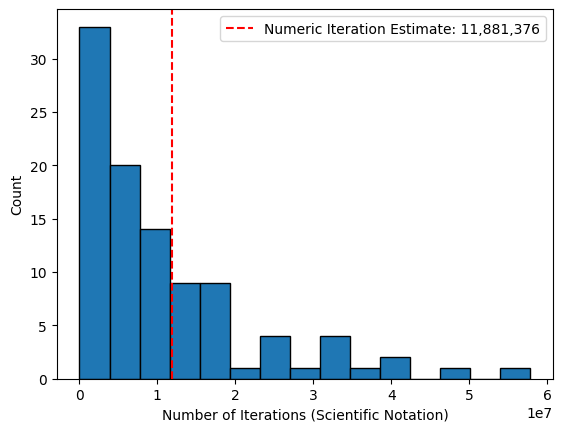

In [7]:
plt.hist(iteration_list,edgecolor='black',bins=15)
plt.axvline(x=num_iters_per_word(target_word), color='r', linestyle='--', label=f'Numeric Iteration Estimate: {num_iters_per_word(target_word):,}')
plt.xlabel('Number of Iterations (Scientific Notation)')
plt.ylabel('Count')
plt.legend();

### **Computational Experiment: Number of Iterations to Generate 2 Target Words with Random Selections**

In [ ]:
multiple_targets = ['chimp','fun']



# **References and Additional Learning**

## **Academic Paper**

- **[Monkeys and Walks](https://math.uchicago.edu/~may/VIGRE/VIGRE2006/PAPERS/Waliji.pdf) by Muhammad Waliji**

## **Academic Presentations**

- **[Probability and the Infinite Monkey Theorem
](https://bpb-us-w2.wpmucdn.com/web.sas.upenn.edu/dist/e/952/files/2023/12/Marchlinski-Presentation-F23.pdf) by Dylan Marchlinski**

- **[The Borel-Cantelli Lemma and the Growth Rate of Partial Maxima](https://sites.duke.edu/kits_team_101_48585/files/2023/03/The_Borel_Cantelli_Lemma_and_the_Growth_Rate_of_Partial_Maxima.pdf) by Qixuan Wang**

- **[Probability in Computing](https://cs-people.bu.edu/januario/teaching/cs237/fa23/slides/lec13.pdf) by John Byers and Tiago Januario**

## **Python Module**

- **[`random` module](https://docs.python.org/3/library/random.html) from Python.org**

## **Website**

- **[Second Borel-Cantelli Lemma](https://proofwiki.org/wiki/Second_Borel-Cantelli_Lemma) from proofwiki.org**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [X](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717), [Medium](https://adriandolinay.medium.com/) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**

# **Podcast**

- **Check out Adrian's Podcast, The Aspiring STEM Geek on [YouTube](https://www.youtube.com/@AdrianDolinay/podcasts), [Spotify](https://open.spotify.com/show/60dPNJbDPaPw7ru8g5btxV), [Apple Podcasts](https://podcasts.apple.com/us/podcast/the-aspiring-stem-geek/id1765996824), [Audible](https://www.audible.com/podcast/The-Aspiring-STEM-Geek/B0DC73S9SN?eac_link=MCFKvkxuqKYU&ref=web_search_eac_asin_1&eac_selected_type=asin&eac_selected=B0DC73S9SN&qid=IrZ84nGqvz&eac_id=141-8769271-5781515_IrZ84nGqvz&sr=1-1) and [iHeart Radio](https://www.iheart.com/podcast/269-the-aspiring-stem-geek-202676097/)!**